# Compare correlations with and without self-regulation


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

## Without self loop


In [87]:
#PARAM VALS FOR THIS RUN
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/simulations_parameter_scan_ec50_equals_median_kOn_added/k_Tf_on/samples_replicates_over_time_with_regulation_param_index_9_run_9.csv'
sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/two_way_regulation/test/samples_replicates_with_regulation_0.csv'
num_sampling_times = 24
num_cells = 20e3

updated_df = pd.read_csv(sim_file_use)
updated_df['unspliced_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['unspliced_labeled_Target']
updated_df['unspliced_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['unspliced_labeled_TF']

updated_df['labeled_Target'] = updated_df['unspliced_labeled_Target']+updated_df['spliced_labeled_Target']
updated_df['labeled_TF'] = updated_df['unspliced_labeled_TF']+updated_df['spliced_labeled_TF']

updated_df['unlabeled_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['spliced_unlabeled_Target']
updated_df['unlabeled_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['spliced_unlabeled_TF']

updated_df

,Unnamed: 0,TF_is_bursting,Target_is_bursting,TF_protein_1K,Target_protein_1K,spliced_labeled_Target,spliced_labeled_TF,spliced_unlabeled_Target,spliced_unlabeled_TF,unspliced_labeled_Target,...,k_on_TF_adjusted,total_TF_mRNA,total_Target_mRNA,sampling_time,replicate,unspliced_TF,labeled_Target,labeled_TF,unlabeled_Target,unlabeled_TF
0,0,False,True,557.150793,1101.385034,0.000000,0.0,487.727262,1.750000e+02,0.0,...,2.818288e+00,1.750000e+02,498.132514,0,0,1.017441e-05,0.000000,0.0,495.132514,1.750000e+02
1,1,False,False,447.806669,658.027100,0.000000,0.0,285.116652,1.450133e+02,0.0,...,1.733055e+00,1.450133e+02,285.116652,0,0,1.301380e-07,0.000000,0.0,285.116652,1.450133e+02
2,2,False,False,6.642168,10.923554,0.000000,0.0,0.000000,1.429480e-319,0.0,...,7.977228e-04,1.429480e-319,0.000000,0,0,0.000000e+00,0.000000,0.0,0.000000,1.429480e-319
3,3,False,False,500.120496,913.507695,0.000000,0.0,501.467674,1.555133e+02,0.0,...,2.434414e+00,1.555309e+02,501.533333,0,0,1.756873e-02,0.000000,0.0,501.533333,1.555309e+02
4,4,True,False,543.633755,1054.798003,0.000000,0.0,315.533333,2.629021e+02,0.0,...,2.732512e+00,2.639021e+02,317.533333,0,0,2.954055e-13,0.000000,0.0,315.533333,2.629021e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,True,False,506.507710,1024.900446,0.333333,0.0,553.472026,2.297084e+02,0.0,...,2.673521e+00,2.360854e+02,553.805359,1440,1,6.377079e+00,0.333333,0.0,553.472026,2.360854e+02
999996,999996,False,False,26.681020,43.956969,0.000000,0.0,0.000000,3.920000e+00,0.0,...,1.286495e-02,3.920000e+00,0.000000,1440,1,4.214380e-321,0.000000,0.0,0.000000,3.920000e+00
999997,999997,True,False,557.791059,832.276616,0.333333,0.0,451.696013,2.435942e+02,0.0,...,2.233828e+00,2.500574e+02,459.435002,1440,1,6.463259e+00,0.333333,0.0,459.101669,2.500574e+02
999998,999998,False,False,0.408773,0.364471,0.000000,0.0,0.000000,0.000000e+00,0.0,...,8.871023e-07,0.000000e+00,0.000000,1440,1,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00


Replicate 0 at time 1 shape: (20000, 29)
Replicate 1 at time 2 shape: (20000, 29)
Spearman correlation: -5.57e-01


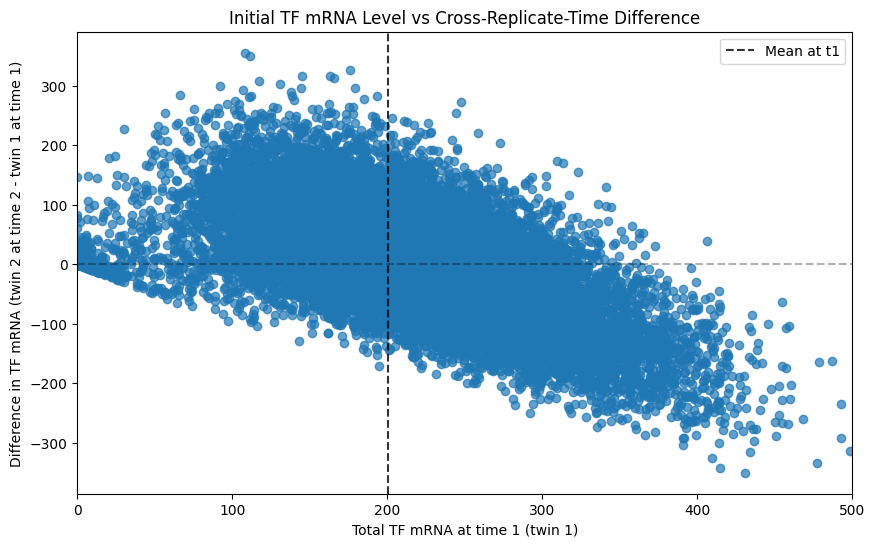

In [92]:
t1_data = updated_df[updated_df['sampling_time'] == 300]
t2_data = updated_df[updated_df['sampling_time'] == 600]

rep0_t1 = t1_data[t1_data['replicate'] == 0].reset_index(drop=True)
rep0_t2 = t2_data[t2_data['replicate'] == 0].reset_index(drop=True)
rep1_t1 = t1_data[t1_data['replicate'] == 1].reset_index(drop=True)
rep1_t2 = t2_data[t2_data['replicate'] == 1].reset_index(drop=True)
print("Replicate 0 at time 1 shape:", rep0_t1.shape)
print("Replicate 1 at time 2 shape:", rep1_t2.shape)

# Plot: Initial level (rep0_t1) vs difference between replicates at second time point
plt.figure(figsize=(10, 6))
plt.scatter(rep0_t1['total_TF_mRNA'], 
           rep1_t2['total_TF_mRNA'] - rep0_t1['total_TF_mRNA'], alpha=0.7)
corr = spearmanr(rep0_t1['total_TF_mRNA'], rep1_t2['total_TF_mRNA'] - rep0_t1['total_TF_mRNA'])
print(f"Spearman correlation: {corr.correlation:.2e}")
#Add vertical lines for 30th and 70th percentiles
plt.xlim(0,500)
# plt.axvline(x=np.percentile(rep0_t1['total_TF_mRNA'], 30), color='red', linestyle='--', alpha=0.5)
# plt.axvline(x=np.percentile(rep0_t1['total_TF_mRNA'], 70), color='blue', linestyle='--', alpha=0.5)
#Plot mean
mean_t1 = rep0_t1['total_TF_mRNA'].mean()
plt.axvline(x=mean_t1, color='black', linestyle='--', alpha=0.8, label='Mean at t1')
plt.xlabel('Total TF mRNA at time 1 (twin 1)')
plt.ylabel('Difference in TF mRNA (twin 2 at time 2 - twin 1 at time 1)')
plt.title('Initial TF mRNA Level vs Cross-Replicate-Time Difference')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

Replicate 0 at time 1 shape: (8000, 26)
Replicate 1 at time 2 shape: (8000, 26)
Spearman correlation: -3.17e-01


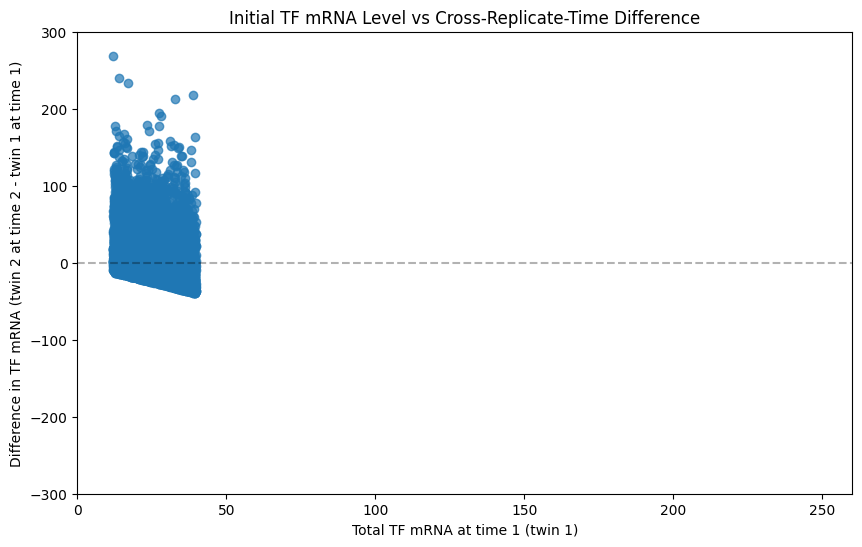

In [76]:
t1_data = updated_df[updated_df['sampling_time'] == 300]
t2_data = updated_df[updated_df['sampling_time'] == 600]

rep0_t1 = t1_data[t1_data['replicate'] == 0].reset_index(drop=True)
#Select the middle 40 percentile of replicate 0
rep0_t1_filtered = rep0_t1[(rep0_t1['total_TF_mRNA'] >= rep0_t1['total_TF_mRNA'].quantile(0.3)) & 
                            (rep0_t1['total_TF_mRNA'] <= rep0_t1['total_TF_mRNA'].quantile(0.7))]

rep0_t2 = t2_data[t2_data['replicate'] == 0].reset_index(drop=True)
rep1_t1 = t1_data[t1_data['replicate'] == 1].reset_index(drop=True)
rep1_t2 = t2_data[t2_data['replicate'] == 1].reset_index(drop=True)
# Now select the corresponding replicate 1 at time 2 based on rep0_t1_filtered index
rep1_t2_filtered = rep1_t2.loc[rep0_t1_filtered.index].reset_index(drop=True)
rep0_t1_filtered = rep0_t1_filtered.reset_index(drop=True)

print("Replicate 0 at time 1 shape:", rep0_t1_filtered.shape)
print("Replicate 1 at time 2 shape:", rep1_t2_filtered.shape)

# Plot: Initial level (rep0_t1) vs difference between replicates at second time point
plt.figure(figsize=(10, 6))
plt.scatter(rep0_t1_filtered['total_TF_mRNA'], 
           rep1_t2_filtered['total_TF_mRNA'] - rep0_t1_filtered['total_TF_mRNA'], alpha=0.7)
corr = spearmanr(rep0_t1_filtered['total_TF_mRNA'], rep1_t2_filtered['total_TF_mRNA'] - rep0_t1_filtered['total_TF_mRNA'])
print(f"Spearman correlation: {corr.correlation:.2e}")
plt.xlabel('Total TF mRNA at time 1 (twin 1)')
plt.ylabel('Difference in TF mRNA (twin 2 at time 2 - twin 1 at time 1)')
plt.title('Initial TF mRNA Level vs Cross-Replicate-Time Difference')
plt.xlim(0, 260)
plt.ylim(-300, 300)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.show()

## Self-loop


In [93]:
#PARAM VALS FOR THIS RUN
# sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/simulations_parameter_scan_ec50_equals_median_kOn_added/k_Tf_on/samples_replicates_over_time_with_regulation_param_index_9_run_9.csv'
sim_file_use = '/home/mzo5929/Keerthana/grnInference/simulationData/self_regulation/samples_replicates_with_regulation_0.csv'
num_sampling_times = 24
num_cells = 20e3

updated_df = pd.read_csv(sim_file_use)
updated_df['unspliced_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['unspliced_labeled_Target']
updated_df['unspliced_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['unspliced_labeled_TF']

updated_df['labeled_Target'] = updated_df['unspliced_labeled_Target']+updated_df['spliced_labeled_Target']
updated_df['labeled_TF'] = updated_df['unspliced_labeled_TF']+updated_df['spliced_labeled_TF']

updated_df['unlabeled_Target'] = updated_df['unspliced_unlabeled_Target']+updated_df['spliced_unlabeled_Target']
updated_df['unlabeled_TF'] = updated_df['unspliced_unlabeled_TF']+updated_df['spliced_unlabeled_TF']

updated_df

,Unnamed: 0,TF_is_bursting,Target_is_bursting,TF_protein_1K,Target_protein_1K,spliced_labeled_Target,spliced_labeled_TF,spliced_unlabeled_Target,spliced_unlabeled_TF,unspliced_labeled_Target,...,k_on_TF_adjusted,total_TF_mRNA,total_Target_mRNA,sampling_time,replicate,unspliced_TF,labeled_Target,labeled_TF,unlabeled_Target,unlabeled_TF
0,0,True,False,617.216267,848.841161,0.000000,0.0,395.266667,275.884415,0.0,...,2.817669,282.166340,398.266667,0,0,6.281926e+00,0.000000,0.0,395.266667,282.166340
1,1,False,True,645.778619,1041.193751,0.000000,0.0,396.496860,300.943822,0.0,...,2.911441,305.943870,403.902678,0,0,4.770574e-05,0.000000,0.0,403.902678,300.943870
2,2,False,True,197.040180,318.660470,0.000000,0.0,193.053039,65.138169,0.0,...,0.821982,66.138169,201.458873,0,0,8.516141e-15,0.000000,0.0,200.458873,65.138169
3,3,False,False,87.821296,242.287662,0.000000,0.0,69.702688,79.880000,0.0,...,0.392174,79.880000,69.702688,0,0,8.040558e-16,0.000000,0.0,69.702688,79.880000
4,4,False,False,196.640543,239.043535,0.000000,0.0,138.402195,16.480000,0.0,...,0.820012,16.480000,139.402195,0,0,1.717164e-179,0.000000,0.0,138.402195,16.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,False,True,423.226504,715.259944,0.000000,0.0,290.867014,150.876131,0.0,...,2.011376,150.876131,298.266667,1440,1,4.677646e-25,0.000000,0.0,298.266667,150.876131
999996,999996,False,False,355.115568,851.316434,0.933333,0.0,208.000000,209.474200,0.0,...,1.662066,209.474200,208.933333,1440,1,8.292665e-15,0.933333,0.0,208.000000,209.474200
999997,999997,False,False,570.426933,969.320503,0.533333,0.0,419.169344,157.254794,0.0,...,2.649960,157.254794,419.702677,1440,1,2.395987e-16,0.533333,0.0,419.169344,157.254794
999998,999998,False,False,640.180701,1072.939281,2.333333,0.0,316.636985,367.577973,0.0,...,2.892639,367.577973,318.970319,1440,1,1.272562e-27,2.333333,0.0,316.636985,367.577973


Replicate 0 at time 1 shape: (20000, 29)
Replicate 1 at time 2 shape: (20000, 29)
Spearman correlation: -3.93e-01


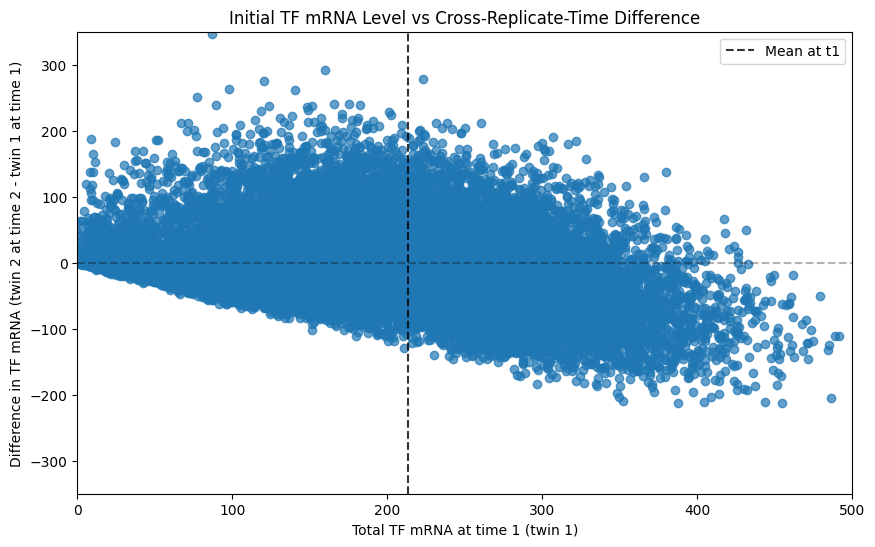

In [97]:
t1_data = updated_df[updated_df['sampling_time'] == 0]
t2_data = updated_df[updated_df['sampling_time'] == 180]

rep0_t1 = t1_data[t1_data['replicate'] == 0].reset_index(drop=True)
rep0_t2 = t2_data[t2_data['replicate'] == 0].reset_index(drop=True)
rep1_t1 = t1_data[t1_data['replicate'] == 1].reset_index(drop=True)
rep1_t2 = t2_data[t2_data['replicate'] == 1].reset_index(drop=True)
print("Replicate 0 at time 1 shape:", rep0_t1.shape)
print("Replicate 1 at time 2 shape:", rep1_t2.shape)

# Plot: Initial level (rep0_t1) vs difference between replicates at second time point
plt.figure(figsize=(10, 6))
plt.scatter(rep0_t1['total_TF_mRNA'], 
           rep1_t2['total_TF_mRNA'] - rep0_t1['total_TF_mRNA'], alpha=0.7)
corr = spearmanr(rep0_t1['total_TF_mRNA'], rep1_t2['total_TF_mRNA'] - rep0_t1['total_TF_mRNA'])
print(f"Spearman correlation: {corr.correlation:.2e}")
#Add vertical lines for 30th and 70th percentiles
# plt.axvline(x=np.percentile(rep0_t1['total_TF_mRNA'], 30), color='red', linestyle='--', alpha=0.5)
# plt.axvline(x=np.percentile(rep0_t1['total_TF_mRNA'], 70), color='blue', linestyle='--', alpha=0.5)
#Plot mean
mean_t1 = rep0_t1['total_TF_mRNA'].mean()
plt.axvline(x=mean_t1, color='black', linestyle='--', alpha=0.8, label='Mean at t1')
plt.xlim(0, 500)
plt.ylim(-350, 350)
plt.xlabel('Total TF mRNA at time 1 (twin 1)')
plt.ylabel('Difference in TF mRNA (twin 2 at time 2 - twin 1 at time 1)')
plt.title('Initial TF mRNA Level vs Cross-Replicate-Time Difference')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

Replicate 0 at time 1 shape: (8000, 29)
Replicate 1 at time 2 shape: (8000, 29)
Spearman correlation: -2.51e-01


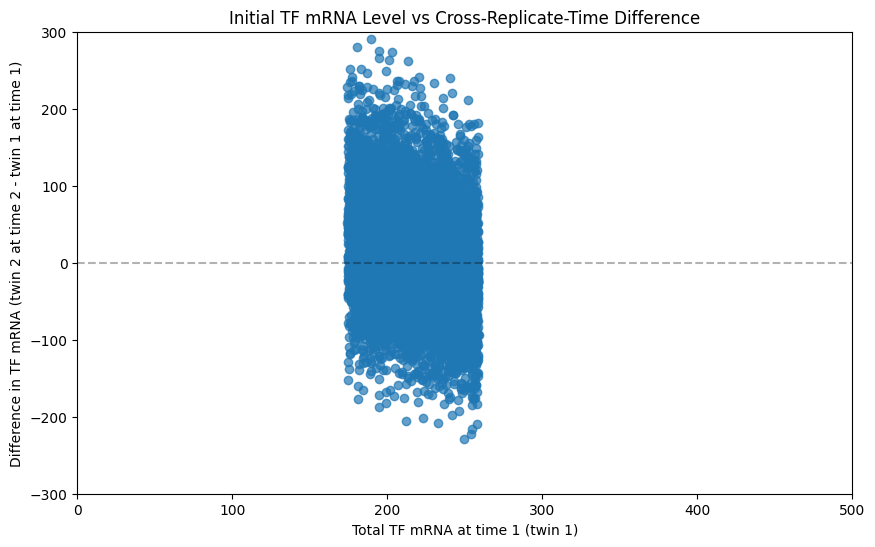

In [81]:
t1_data = updated_df[updated_df['sampling_time'] == 300]
t2_data = updated_df[updated_df['sampling_time'] == 600]

rep0_t1 = t1_data[t1_data['replicate'] == 0].reset_index(drop=True)
#Select the middle 40 percentile of replicate 0
rep0_t1_filtered = rep0_t1[(rep0_t1['total_TF_mRNA'] >= rep0_t1['total_TF_mRNA'].quantile(0.3)) & 
                            (rep0_t1['total_TF_mRNA'] <= rep0_t1['total_TF_mRNA'].quantile(0.7))]

rep0_t2 = t2_data[t2_data['replicate'] == 0].reset_index(drop=True)
rep1_t1 = t1_data[t1_data['replicate'] == 1].reset_index(drop=True)
rep1_t2 = t2_data[t2_data['replicate'] == 1].reset_index(drop=True)
# Now select the corresponding replicate 1 at time 2 based on rep0_t1_filtered index
rep1_t2_filtered = rep1_t2.loc[rep0_t1_filtered.index].reset_index(drop=True)
rep0_t1_filtered = rep0_t1_filtered.reset_index(drop=True)

print("Replicate 0 at time 1 shape:", rep0_t1_filtered.shape)
print("Replicate 1 at time 2 shape:", rep1_t2_filtered.shape)

# Plot: Initial level (rep0_t1) vs difference between replicates at second time point
plt.figure(figsize=(10, 6))
plt.scatter(rep0_t1_filtered['total_TF_mRNA'], 
           rep1_t2_filtered['total_TF_mRNA'] - rep0_t1_filtered['total_TF_mRNA'], alpha=0.7)
corr = spearmanr(rep0_t1_filtered['total_TF_mRNA'], rep1_t2_filtered['total_TF_mRNA'] - rep0_t1_filtered['total_TF_mRNA'])
print(f"Spearman correlation: {corr.correlation:.2e}")
plt.xlim(0, 500)
plt.ylim(-300, 300)
plt.xlabel('Total TF mRNA at time 1 (twin 1)')
plt.ylabel('Difference in TF mRNA (twin 2 at time 2 - twin 1 at time 1)')
plt.title('Initial TF mRNA Level vs Cross-Replicate-Time Difference')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.show()

Sister 0 shape: (20000, 29)
Sister 1 shape: (20000, 29)

=== SISTER CELL SELF-REGULATION ANALYSIS ===
Sister Difference vs Mean: 0.1979 (p=7.84e-176)
Log Sister Ratio vs Mean:  -0.2309 (p=2.74e-240)
Sister CV vs Mean:         -0.2309 (p=2.74e-240)


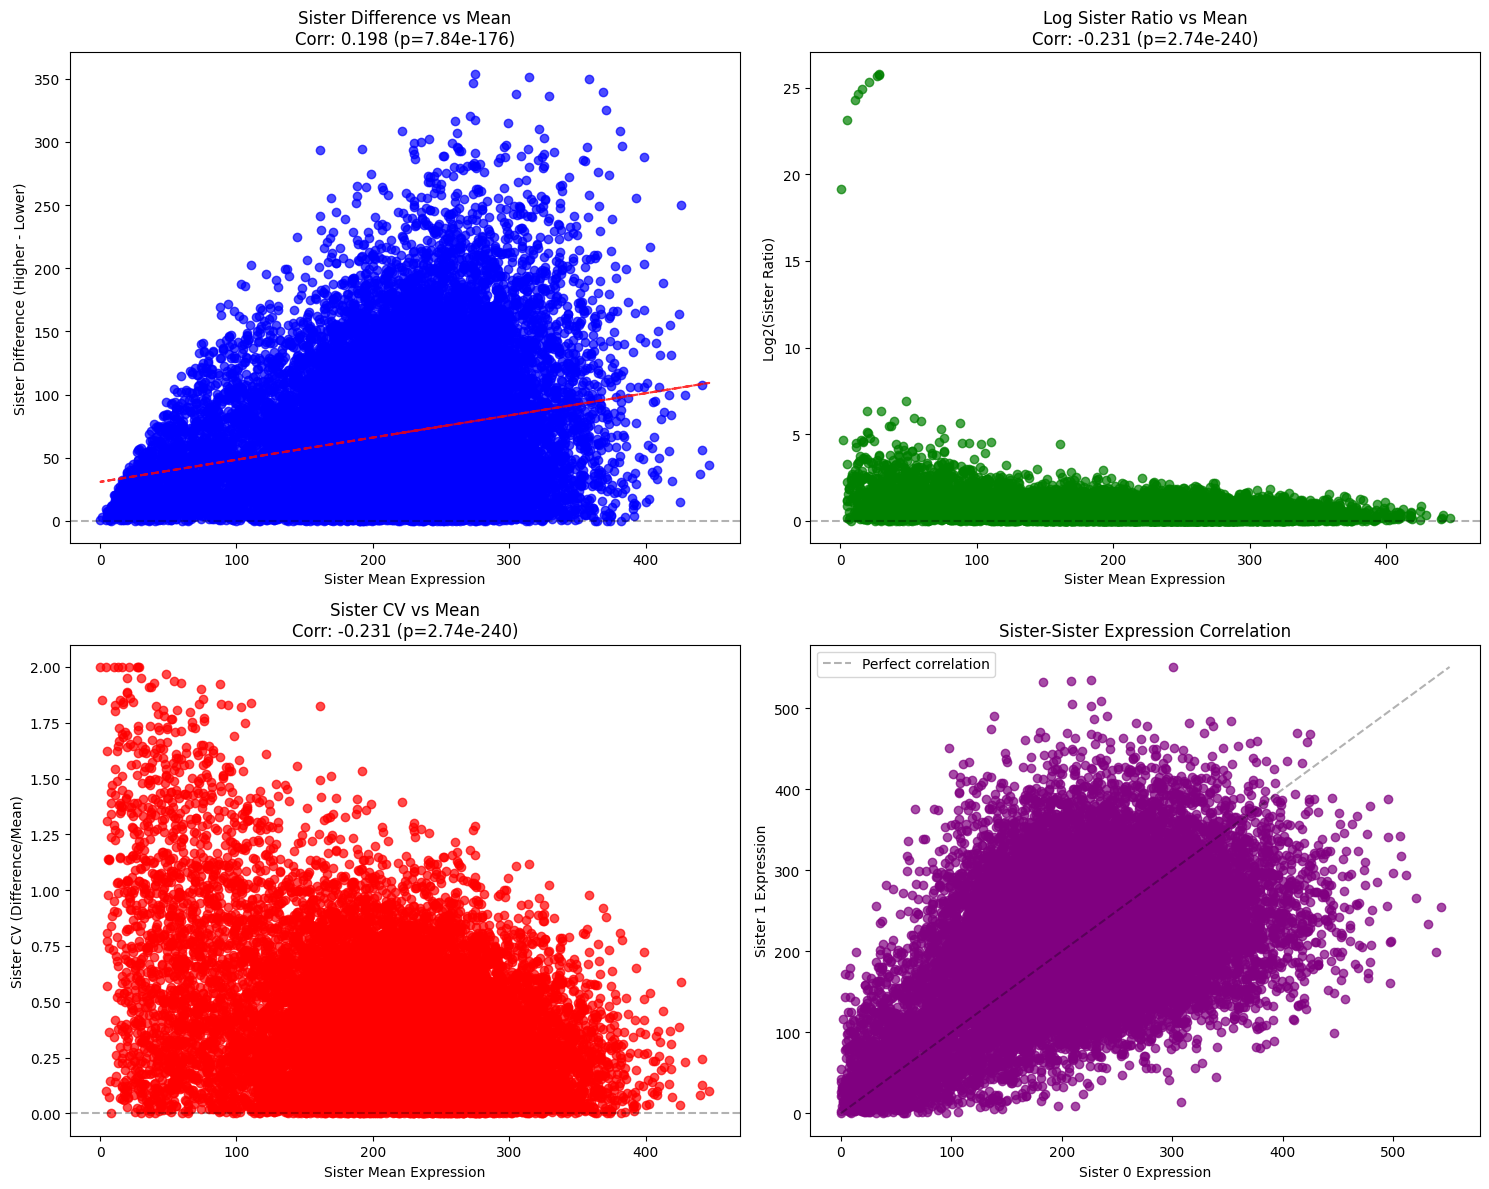


=== INTERPRETATION ===
Expected patterns:
  Negative self-regulation: NEGATIVE correlation (differences decrease with mean)
  Positive self-regulation: POSITIVE correlation (differences increase with mean)
  No self-regulation: NO correlation (differences independent of mean)

🔼 STRONG evidence for POSITIVE self-regulation (auto-activation)
   → Higher mean expression → larger sister differences
   → Self-regulation amplifies variability at high expression

Supporting evidence:
  - Sister ratio analysis: -0.231 (should match direction)
  - Sister CV analysis: -0.231 (should match direction)
  ❌ Metrics disagree - interpret with caution

=== BINNED ANALYSIS (5 bins) ===
  Bin 1: Mean=102.6, Diff=49.35±39.11
  Bin 2: Mean=185.9, Diff=64.02±48.28
  Bin 3: Mean=221.5, Diff=69.47±51.97
  Bin 4: Mean=254.3, Diff=76.19±57.51
  Bin 5: Mean=306.3, Diff=83.28±63.23

=== SUMMARY STATISTICS ===
Number of sister pairs: 20000
Mean sister difference: 68.46
Std sister difference: 53.91
Mean sister ra

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Get sister cell data at the same time point
t1_data = updated_df[updated_df['sampling_time'] == 300]

# Extract sister pairs (rep0 and rep1 are sisters from same mother cell)
sister0 = t1_data[t1_data['replicate'] == 0].reset_index(drop=True)
sister1 = t1_data[t1_data['replicate'] == 1].reset_index(drop=True)

print("Sister 0 shape:", sister0.shape)
print("Sister 1 shape:", sister1.shape)

# Ensure we have matching pairs
assert len(sister0) == len(sister1), "Sister pairs don't match!"

# Calculate sister cell statistics
higherSister = np.maximum(sister0['total_TF_mRNA'], sister1['total_TF_mRNA'])
lowerSister = np.minimum(sister0['total_TF_mRNA'], sister1['total_TF_mRNA'])

sisterDifference = higherSister - lowerSister
sisterMean = (higherSister + lowerSister) / 2

# Additional metrics
sisterRatio = higherSister / (lowerSister + 1e-6)  # Avoid division by zero
logSisterRatio = np.log2(sisterRatio)
coefficientOfVariation = sisterDifference / sisterMean

# Calculate correlations
corrDifference = spearmanr(sisterMean, sisterDifference)
corrRatio = spearmanr(sisterMean, logSisterRatio)
corrCV = spearmanr(sisterMean, coefficientOfVariation)

print("\n=== SISTER CELL SELF-REGULATION ANALYSIS ===")
print(f"Sister Difference vs Mean: {corrDifference.correlation:.4f} (p={corrDifference.pvalue:.2e})")
print(f"Log Sister Ratio vs Mean:  {corrRatio.correlation:.4f} (p={corrRatio.pvalue:.2e})")
print(f"Sister CV vs Mean:         {corrCV.correlation:.4f} (p={corrCV.pvalue:.2e})")

# Create comprehensive plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Sister Difference vs Mean
axes[0,0].scatter(sisterMean, sisterDifference, alpha=0.7, color='blue')
axes[0,0].set_xlabel('Sister Mean Expression')
axes[0,0].set_ylabel('Sister Difference (Higher - Lower)')
axes[0,0].set_title(f'Sister Difference vs Mean\nCorr: {corrDifference.correlation:.3f} (p={corrDifference.pvalue:.2e})')
axes[0,0].axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Add trend line
z = np.polyfit(sisterMean, sisterDifference, 1)
p = np.poly1d(z)
axes[0,0].plot(sisterMean, p(sisterMean), "r--", alpha=0.8)

# Plot 2: Log Sister Ratio vs Mean  
axes[0,1].scatter(sisterMean, logSisterRatio, alpha=0.7, color='green')
axes[0,1].set_xlabel('Sister Mean Expression')
axes[0,1].set_ylabel('Log2(Sister Ratio)')
axes[0,1].set_title(f'Log Sister Ratio vs Mean\nCorr: {corrRatio.correlation:.3f} (p={corrRatio.pvalue:.2e})')
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Plot 3: Sister CV vs Mean
axes[1,0].scatter(sisterMean, coefficientOfVariation, alpha=0.7, color='red')
axes[1,0].set_xlabel('Sister Mean Expression')
axes[1,0].set_ylabel('Sister CV (Difference/Mean)')
axes[1,0].set_title(f'Sister CV vs Mean\nCorr: {corrCV.correlation:.3f} (p={corrCV.pvalue:.2e})')
axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.3)

# Plot 4: Sister pairs scatter plot
axes[1,1].scatter(sister0['total_TF_mRNA'], sister1['total_TF_mRNA'], alpha=0.7, color='purple')
axes[1,1].plot([0, max(max(sister0['total_TF_mRNA']), max(sister1['total_TF_mRNA']))], 
               [0, max(max(sister0['total_TF_mRNA']), max(sister1['total_TF_mRNA']))], 
               'k--', alpha=0.3, label='Perfect correlation')
axes[1,1].set_xlabel('Sister 0 Expression')
axes[1,1].set_ylabel('Sister 1 Expression')
axes[1,1].set_title('Sister-Sister Expression Correlation')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# Detailed interpretation
def interpretSelfRegulation(corrDiff, corrRatio, corrCV):
    """Interpret self-regulation based on sister cell correlations"""
    
    print("\n=== INTERPRETATION ===")
    print("Expected patterns:")
    print("  Negative self-regulation: NEGATIVE correlation (differences decrease with mean)")
    print("  Positive self-regulation: POSITIVE correlation (differences increase with mean)")
    print("  No self-regulation: NO correlation (differences independent of mean)")
    print()
    
    # Primary analysis: Sister difference
    if corrDiff.pvalue < 0.05:
        if corrDiff.correlation < -0.15:
            print("🔽 STRONG evidence for NEGATIVE self-regulation (autorepression)")
            print("   → Higher mean expression → smaller sister differences")
            print("   → Self-regulation reduces variability at high expression")
        elif corrDiff.correlation < -0.05:
            print("🔽 WEAK evidence for negative self-regulation")
        elif corrDiff.correlation > 0.15:
            print("🔼 STRONG evidence for POSITIVE self-regulation (auto-activation)")
            print("   → Higher mean expression → larger sister differences") 
            print("   → Self-regulation amplifies variability at high expression")
        elif corrDiff.correlation > 0.05:
            print("🔼 WEAK evidence for positive self-regulation")
        else:
            print("➡️  NO clear self-regulation pattern")
    else:
        print("❌ NO significant self-regulation detected")
    
    # Supporting evidence
    print(f"\nSupporting evidence:")
    print(f"  - Sister ratio analysis: {corrRatio.correlation:.3f} (should match direction)")
    print(f"  - Sister CV analysis: {corrCV.correlation:.3f} (should match direction)")
    
    # Consistency check
    sameDirection = (np.sign(corrDiff.correlation) == np.sign(corrRatio.correlation) == np.sign(corrCV.correlation))
    if sameDirection and all(p < 0.05 for p in [corrDiff.pvalue, corrRatio.pvalue, corrCV.pvalue]):
        print("  ✅ All metrics agree - high confidence result")
    elif sameDirection:
        print("  ⚠️  Metrics agree in direction but some not significant")
    else:
        print("  ❌ Metrics disagree - interpret with caution")

# Run interpretation
interpretSelfRegulation(corrDifference, corrRatio, corrCV)

# Binned analysis for non-linear effects
def binnedSisterAnalysis(sisterMean, sisterDiff, numBins=5):
    """Analyze sister differences across expression bins"""
    
    print(f"\n=== BINNED ANALYSIS ({numBins} bins) ===")
    binEdges = np.percentile(sisterMean, np.linspace(0, 100, numBins + 1))
    
    binMeans = []
    binDiffMeans = []
    binDiffStds = []
    
    for i in range(numBins):
        if i == numBins - 1:
            binMask = (sisterMean >= binEdges[i]) & (sisterMean <= binEdges[i + 1])
        else:
            binMask = (sisterMean >= binEdges[i]) & (sisterMean < binEdges[i + 1])
        
        binMeanExpr = np.mean(sisterMean[binMask])
        binMeanDiff = np.mean(sisterDiff[binMask])
        binStdDiff = np.std(sisterDiff[binMask])
        
        binMeans.append(binMeanExpr)
        binDiffMeans.append(binMeanDiff)
        binDiffStds.append(binStdDiff)
        
        print(f"  Bin {i+1}: Mean={binMeanExpr:.1f}, Diff={binMeanDiff:.2f}±{binStdDiff:.2f}")
    
    return binMeans, binDiffMeans, binDiffStds

# Run binned analysis
binMeans, binDiffMeans, binDiffStds = binnedSisterAnalysis(sisterMean, sisterDifference)

print(f"\n=== SUMMARY STATISTICS ===")
print(f"Number of sister pairs: {len(sisterMean)}")
print(f"Mean sister difference: {np.mean(sisterDifference):.2f}")
print(f"Std sister difference: {np.std(sisterDifference):.2f}")
print(f"Mean sister ratio: {np.mean(sisterRatio):.2f}")
print(f"Mean expression range: {np.min(sisterMean):.1f} - {np.max(sisterMean):.1f}")